In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

In [63]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [10]:
drive.mount('/content/drive')
caminho_arquivo = '/content/drive/My Drive/Cursos/TIC/pinguins.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df = pd.read_excel(caminho_arquivo)

In [13]:
df.head()

,Espece,Ilha,largura do bico,profundidade do bico,profundidade do bico.1,massa corporal,sexo
0,Adelie,Torgersen,39.1,2023-07-18 00:00:00,181.0,3750.0,male
1,Adelie,Torgersen,39.5,2023-04-17 00:00:00,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,2023-03-19 00:00:00,193.0,3450.0,female


In [38]:
df.shape

(344, 7)

In [51]:
total_nulos = df.isnull().sum().sum()
total_nulos

19

Quais pinguins não têm anotações?

In [50]:
filt = df.isnull().any(axis = 1)
df[filt]

,Espece,Ilha,largura do bico,profundidade do bico,profundidade do bico.1,massa corporal,sexo
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,2023-01-18 00:00:00,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,2023-02-20 00:00:00,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,2023-01-17 00:00:00,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,2023-03-17 00:00:00,180.0,3700.0,NaN
47,Adelie,Dream,37.5,2023-09-18 00:00:00,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.5,2023-03-14 00:00:00,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.2,2023-04-14 00:00:00,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.3,2023-08-13 00:00:00,216.0,4725.0,NaN
268,Gentoo,Biscoe,44.5,2023-07-15 00:00:00,217.0,4875.0,NaN


Há 11 pinguins contendo algum registro sem anotação. Os registros que foram encontrados pinguins sem anotação são: largura do bico, profundidade do bico, profundidade do bico.1, massa corporal e sexo.

Quais ilhas a maioria dos pinguins está vindo?

In [19]:
df['Ilha'].value_counts()

Ilha
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

Os pinguins estão vindo essencialmente de três ilhas: Biscoe, Dream e Torgersen.  
A ilha com maior ocorrência de pinguins é Biscoe (168), seguida do Dream (124) e Torgersen (52).

Quais as espécies que a ONG mais possui?

In [20]:
df['Espece'].value_counts()

Espece
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

A espécie com maior número é a Adelie (152), seguida da Gentoo (124) e Chinstrap (68).

Fazendo a limpeza dos dados. Remoção das 11 linhas contendo campos nulos.

In [54]:
df_mod = df.dropna()

,Espece,Ilha,largura do bico,profundidade do bico,profundidade do bico.1,massa corporal,sexo
0,Adelie,Torgersen,39.1,2023-07-18 00:00:00,181.0,3750.0,male
1,Adelie,Torgersen,39.5,2023-04-17 00:00:00,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18,195.0,3250.0,female
4,Adelie,Torgersen,36.7,2023-03-19 00:00:00,193.0,3450.0,female
5,Adelie,Torgersen,39.3,2023-06-20 00:00:00,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,2023-08-19 00:00:00,207.0,4000.0,male
340,Chinstrap,Dream,43.5,2023-01-18 00:00:00,202.0,3400.0,female
341,Chinstrap,Dream,49.6,2023-02-18 00:00:00,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19,210.0,4100.0,male


In [62]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Espece                  333 non-null    object 
 1   Ilha                    333 non-null    object 
 2   largura do bico         333 non-null    float64
 3   profundidade do bico    333 non-null    object 
 4   profundidade do bico.1  333 non-null    float64
 5   massa corporal          333 non-null    float64
 6   sexo                    333 non-null    object 
dtypes: float64(3), object(4)
memory usage: 28.9+ KB


Aplicação do MinMaxScaler para normalização dos dados númericos.

In [64]:
features = ['largura do bico', 'profundidade do bico.1',  'massa corporal']
df_columns_nums = df_mod[features]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_columns_nums)
scaled_df = pd.DataFrame(scaled_features, columns=features)

Aplicação do One-Hot Encoding para codificação das features categóricas.

In [70]:
categorical_features  = ['Espece', 'sexo']
categorical_data = df_mod[categorical_features]
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(categorical_data).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

Combinar os dataframes escalonados e codificados

In [71]:
final_df = pd.concat([scaled_df, encoded_df], axis=1)

In [72]:
final_df

,largura do bico,profundidade do bico.1,massa corporal,Espece_Adelie,Espece_Chinstrap,Espece_Gentoo,sexo_female,sexo_male
0,0.254545,0.152542,0.291667,1.0,0.0,0.0,0.0,1.0
1,0.269091,0.237288,0.305556,1.0,0.0,0.0,1.0,0.0
2,0.298182,0.389831,0.152778,1.0,0.0,0.0,1.0,0.0
3,0.167273,0.355932,0.208333,1.0,0.0,0.0,1.0,0.0
4,0.261818,0.305085,0.263889,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
328,0.861818,0.593220,0.361111,0.0,1.0,0.0,0.0,1.0
329,0.414545,0.508475,0.194444,0.0,1.0,0.0,1.0,0.0
330,0.636364,0.355932,0.298611,0.0,1.0,0.0,0.0,1.0
331,0.680000,0.644068,0.388889,0.0,1.0,0.0,0.0,1.0


In [74]:
sns.set(style="ticks")

Existe uma relação entre as medidas do pinguim e a espécie?

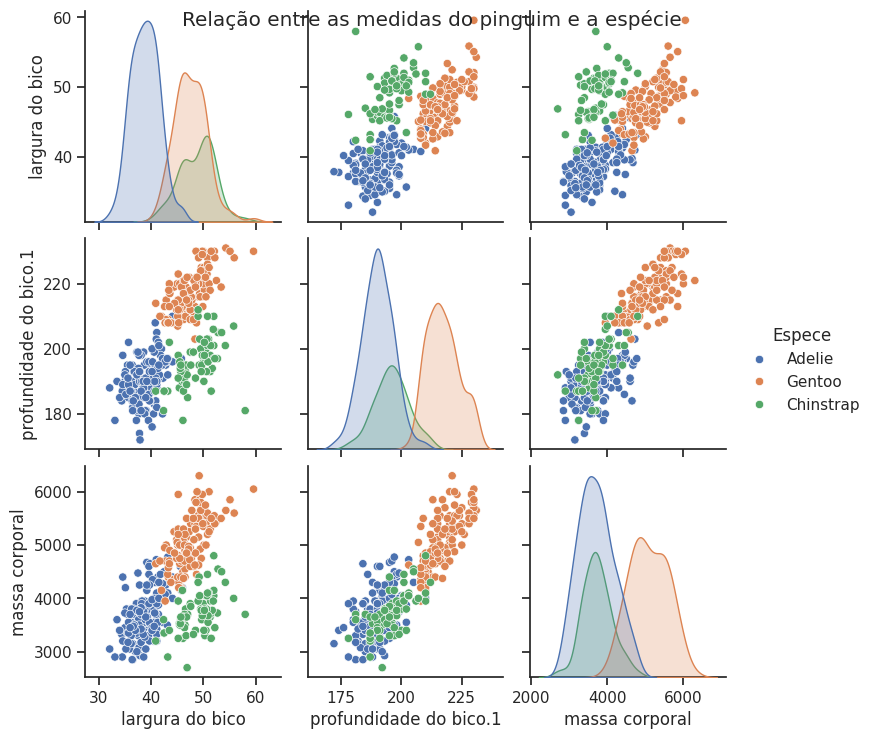

In [82]:
sns.pairplot(df_mod, hue="Espece", vars=["largura do bico", "profundidade do bico.1", "massa corporal"])
plt.suptitle("Relação entre as medidas do pinguim e a espécie")
plt.show()

Sim, a imagem fornece evidências claras de que existe uma relação entre as medidas do pinguim e a espécie através dos seguintes exemplos:

1. Gráfico de dispersão de largura do bico: Podemos ver que os pontos azuis (Adelie) tendem a se agrupar em larguras de bico menores, enquanto os pontos laranja (Gentoo) se concentram em larguras de bico maiores. Os pontos verdes (Chinstrap) ficam em uma faixa intermediária.

2. Gráfico de profundidade do bico: Novamente, os pontos azuis (Adelie) se agrupam em valores menores de profundidade, os laranjas (Gentoo) em valores maiores, e os verdes (Chinstrap) ocupam a região intermediária.

3. Gráfico de massa corporal: Aqui, as espécies se separam mais claramente, com os pontos azuis (Adelie) ocupando a menor faixa de massa, seguidos pelos verdes (Chinstrap) e depois os laranjas (Gentoo) com as maiores massas corporais.


Existe uma relação entre as medidas do pinguim e o sexo para cada uma das três espécies?


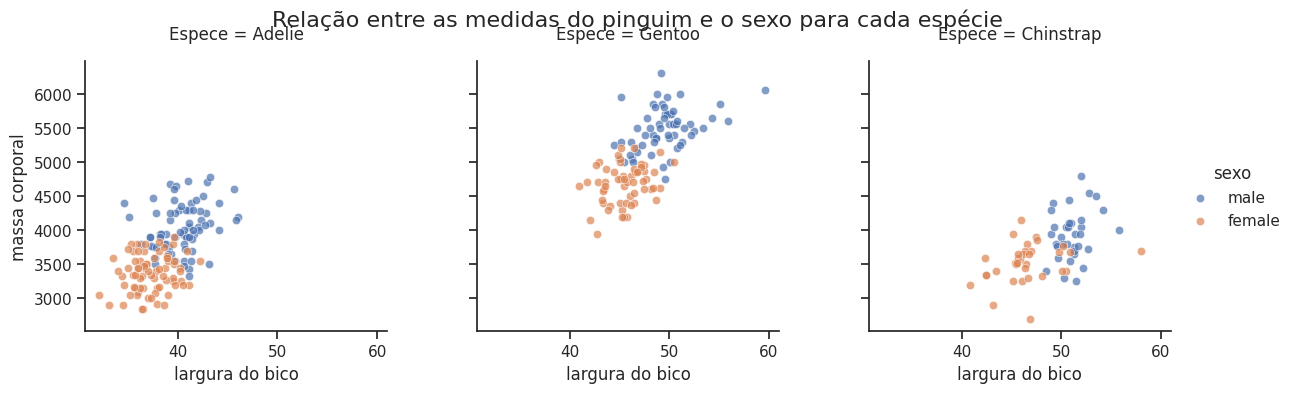

In [87]:
g = sns.FacetGrid(df_mod, col="Espece", hue="sexo", col_wrap=3, height=4, aspect=1)
g.map(sns.scatterplot, "largura do bico", "massa corporal", alpha=0.7)
g.add_legend()

g.fig.subplots_adjust(top=0.85, wspace=0.3)
g.fig.suptitle("Relação entre as medidas do pinguim e o sexo para cada espécie", fontsize=16)

# Reposicionando os títulos dos subplots
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=12, y=1.05)  # Ajusta a posição vertical (y)

plt.show()

Com base nos gráficos de dispersão apresentados, podemos observar que existe uma relação entre as medidas do pinguim, como a largura do bico, e o sexo para cada uma das três espécies:

1. Espécie Adelie:
No gráfico da esquerda, que representa a espécie Adelie, é possível notar uma leve separação entre os pontos azuis (machos) e laranja (fêmeas) na largura do bico. Os machos tendem a ter bicos ligeiramente mais largos que as fêmeas, embora haja uma sobreposição considerável.

2. Espécie Gentoo:
No gráfico central, para a espécie Gentoo, também é possível identificar uma separação entre machos (pontos azuis) e fêmeas (pontos laranja) na largura do bico. Os machos desta espécie parecem ter bicos mais largos em comparação com as fêmeas, com menos sobreposição entre os grupos.

3. Espécie Chinstrap:
No gráfico da direita, referente à espécie Chinstrap, a separação entre machos (azul) e fêmeas (laranja) é menos evidente, mas ainda parece existir uma tendência de os machos terem bicos ligeiramente mais largos.

Portanto, em todas as três espécies analisadas, é possível notar uma relação entre a largura do bico e o sexo dos pinguins, onde os machos tendem a ter bicos mais largos em comparação com as fêmeas, embora o grau de separação varie entre as espécies.